## Table of Content

* [Import Libraries](#Import-Libraries)
* [Read Dataset](#Read-Dataset)
* [Distributions](#Distributions)
    - [Age Distribution](#Age-Distribution)
    - [Gender Distribution](#Gender-Distribution)
    - [Chest Pain Type](#Chest-Pain-Type)
    - [Resting Blood Pressure](#Resting-Blood-Pressure)
    - [Cholesterol](#Cholesterol)
    - [Fasting Blood Sugar](#Fasting-Blood-Sugar)
    - [Resting Electrocardiographic Results](#Resting-Electrocardiographic-Results)
    - [Maximum Heart Rate](#Maximum-Heart-Rate)
    - [Exercise Induced Angina](#Exercise-Induced-Angina)
    - [Output](#Output)
* [Data Pre-process](#Data-Preprocess)
    - [Remove Outliers](#Remove-Outliers)
    - [Splitting Data to Train and Test Sets](#Splitting-Data-to-Train-and-Test-Sets)
    - [Scaling Data](#Scaling-Data)
* [Models](#Models)
    - [Logistic Regression](#Logistic-Regression)
    - [K-NN](#K-NN-Classification)
    - [SVM](#SVM-Classifier)
    - [Naive Bayes](#Naive-Bayes)
    - [Decision Tree](#Decision-Tree)
    - [Random Forest](#Random-Forest)
    - [Neural Network](#Neural-Network)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Read Dataset

About this dataset

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina 
    * Value 1: yes
    * Value 0: no
- ca: number of major vessels (0-3)
- cp : Chest Pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor 
- fbs : (fasting blood sugar > 120 mg/dl) 
    * Value 1: true 
    * Value 0: false
- rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0 = less chance of heart attack. 1 = more chance of heart attack

In [2]:
df = pd.read_csv('heart.csv')
print('Shape of dataset: ', df.shape)
df.head()

Shape of dataset:  (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [6]:
df.corr()['output'].sort_values()

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
output      1.000000
Name: output, dtype: float64

#### Age Distribution

Text(0.5, 1.0, 'Age Distribution of the Patients')

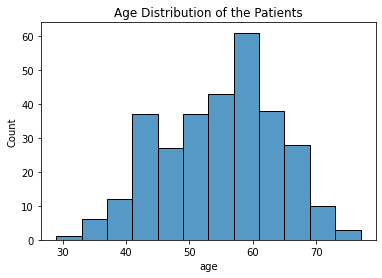

In [7]:
#sns.histplot(df['age'])
sns.histplot(df.age)
plt.title('Age Distribution of the Patients')

#### Gender Distribution

In [8]:
df.sex.value_counts().to_frame()

,sex
1,207
0,96


* 1: Male
* 0: Female

#### Chest Pain Type

Text(0.5, 1.0, 'Chest Pain Type Distribution')

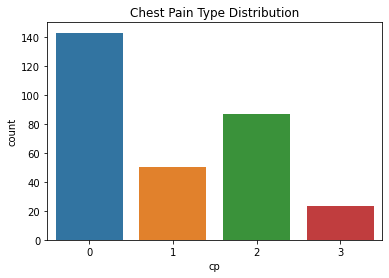

In [9]:
sns.countplot(df.cp)
plt.title('Chest Pain Type Distribution')

#### Resting Blood Pressure

Text(0.5, 1.0, 'Resting Blood Pressure Distribution')

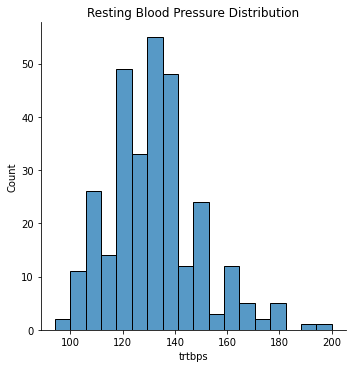

In [10]:
sns.displot(df.trtbps)
plt.title('Resting Blood Pressure Distribution')

#### Cholesterol

Text(0.5, 1.0, 'Cholesterol Distribution')

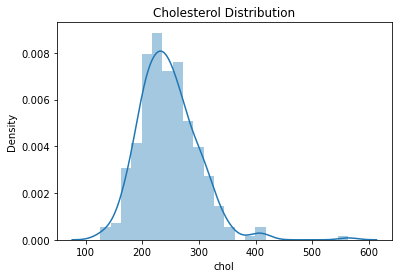

In [11]:
sns.distplot(df.chol)
plt.title('Cholesterol Distribution')

#### Fasting Blood Sugar

In [12]:
df.fbs.value_counts().to_frame()

,fbs
0,258
1,45


* 0: Good blood sugar
* 1: Bad blood sugar

#### Resting Electrocardiographic Results

Text(0.5, 1.0, 'Resting Electrocardiographic Results Distribution')

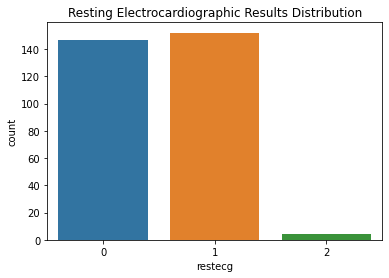

In [13]:
sns.countplot(df.restecg)
plt.title('Resting Electrocardiographic Results Distribution')

#### Maximum Heart Rate

Text(0.5, 1.0, 'Maximum Heart Rate Achieved Distribution')

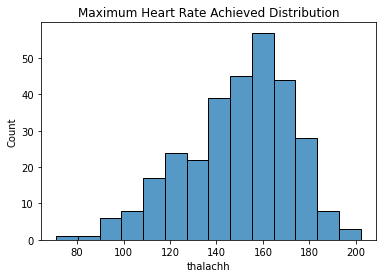

In [14]:
sns.histplot(df.thalachh)
plt.title('Maximum Heart Rate Achieved Distribution')

#### Exercise Induced Angina

In [15]:
df.exng.value_counts().to_frame()

,exng
0,204
1,99


#### Output

<AxesSubplot:xlabel='output', ylabel='count'>

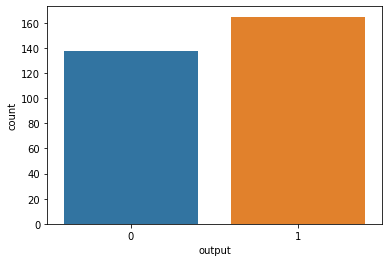

In [16]:
sns.countplot(df['output'])   # from seaborn

<AxesSubplot:>

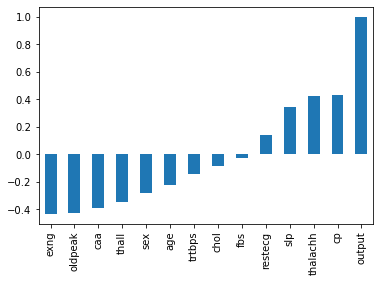

In [17]:
df.corr()['output'].sort_values().plot(kind = 'bar')    # from matplotlib

## Data Preprocess

In [18]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
df.shape

(302, 14)

### Remove Outliers

In [19]:
features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

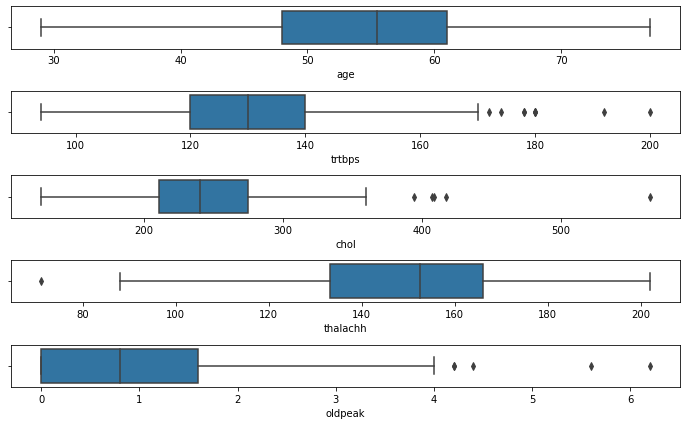

In [20]:
fig, ax = plt.subplots(len(features), 1, figsize = (12,7))

for i,j in zip(range(0, len(features)), features):
    sns.boxplot(ax = ax[i], x = df[j])
plt.subplots_adjust(hspace = 1) 

In [21]:
df_without_outlier = df.copy()

outlier_indexes = list(np.where((df['trtbps'] > 175) | 
                                (df['chol'] > 400) | 
                                (df['thalachh'] < 80) | 
                                (df['oldpeak'] > 4)))
print("Outlier indexes: ", outlier_indexes)

df_without_outlier.drop(index = outlier_indexes[0], inplace = True)
print(df_without_outlier)

df_without_outlier.reset_index(drop = True, inplace = True)

Outlier indexes:  [array([ 28,  85, 101, 110, 202, 203, 219, 220, 222, 245, 247, 249, 259,
       265, 271, 290], dtype=int64)]
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
297   57    0   0     140   241    0        1       123     1      0.2    1   
298   45    1   3     110   264    0        1       132     0      1.2    1   
299   68    1   0     144   193    1        1       141     0      3.4    1   
300   57    1   0     130   131    0        1       115     1      1.2    1   
301

In [22]:
x = df_without_outlier.drop(['output'], axis = 1).values
y = df_without_outlier['output'].values

### Splitting Data to Train and Test Sets

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### Scaling Data

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
from sklearn.model_selection import GridSearchCV

def fit_with_best(model, parameters):
    
    gs = GridSearchCV(estimator = model,
                         param_grid = parameters,
                         scoring = 'accuracy',
                         cv = 10,
                         n_jobs = -1, refit = True)

    gs.fit(x_train, y_train.ravel())

    best_result = gs.best_score_
    best_parameters = gs.best_params_

    print("En iyi parametreler: ", best_parameters)    
    print("En iyi Sonuç: ", best_result, '\n')

In [26]:
from sklearn.model_selection import cross_val_score

def cross_validation_score(estimator):

    # cv: k parameter
    cvs = cross_val_score(estimator = estimator, X = x_train, y = y_train, cv = 10)
    print("Cross Validation Max Score: ", cvs.max())
    print("Cross Validation Min Score: ", cvs.min())
    print("Cross Validation Mean Score: ", cvs.mean())

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

def roc_auc(model, algorithm):
    probs = model.predict_proba(x_test_scaled)
    probs = probs[:, 1]

    model_fpr, model_tpr, thresholds = roc_curve(y_test, probs)
    model_auc = roc_auc_score(y_test, probs)

    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, 'b', marker='.', label = algorithm + ' = %0.3f' % model_auc )

    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def some_metrics(y_pred, algorithms):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap = 'Blues', annot = True)

    clf = classification_report(y_test, y_pred)
    print(clf)

    score = accuracy_score(y_test, y_pred)
    print('Accuracy: ', score)
    plt.title(algorithms)
    plt.show()

# Models

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr_params = [{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
               'fit_intercept': ['True', 'False'], 
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'C': [0.1, 1, 10],}]

lr = LogisticRegression(random_state = 0)

lr.fit(x_train_scaled, y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred = lr.predict(x_test_scaled)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.89      0.59      0.71        27
           1       0.72      0.94      0.82        31

    accuracy                           0.78        58
   macro avg       0.81      0.76      0.76        58
weighted avg       0.80      0.78      0.77        58

Accuracy:  0.7758620689655172


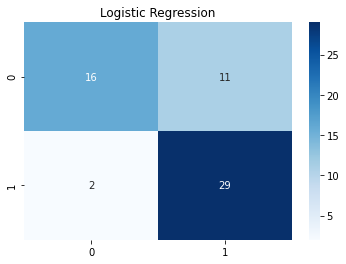

In [31]:
some_metrics(y_pred, 'Logistic Regression')

In [32]:
fit_with_best(lr, lr_params)

En iyi parametreler:  {'C': 1, 'fit_intercept': 'True', 'penalty': 'l2', 'solver': 'liblinear'}
En iyi Sonuç:  0.8511857707509881 



In [33]:
cross_validation_score(lr)

Cross Validation Max Score:  0.9130434782608695
Cross Validation Min Score:  0.782608695652174
Cross Validation Mean Score:  0.8468379446640315


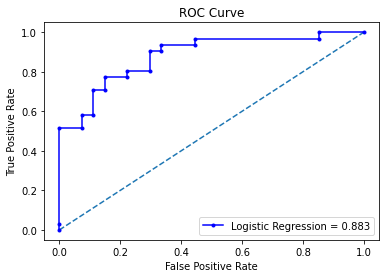

In [34]:
roc_auc(lr, 'Logistic Regression')

## K-NN Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = [{'n_neighbors': [i for i in range(50)], 
               'weights': ['uniform', 'distance'], 
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
               'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']}]

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred = knn.predict(x_test_scaled)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.76      0.94      0.84        31

    accuracy                           0.81        58
   macro avg       0.83      0.80      0.80        58
weighted avg       0.83      0.81      0.81        58

Accuracy:  0.8103448275862069


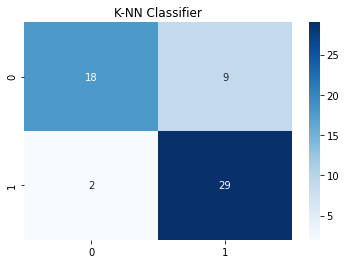

In [37]:
some_metrics(y_pred, 'K-NN Classifier')

In [38]:
fit_with_best(knn, knn_params)

En iyi parametreler:  {'algorithm': 'brute', 'metric': 'seuclidean', 'n_neighbors': 10, 'weights': 'uniform'}
En iyi Sonuç:  0.8468379446640315 



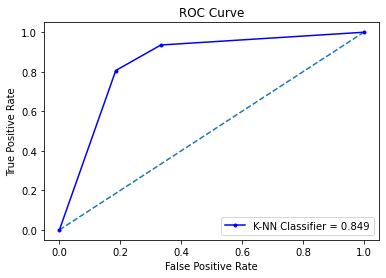

In [39]:
roc_auc(knn, 'K-NN Classifier')

## SVM Classifier

In [40]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', probability = True)
svm.fit(x_train_scaled, y_train)

SVC(probability=True)

In [41]:
y_pred = svm.predict(x_test_scaled)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.76      0.94      0.84        31

    accuracy                           0.81        58
   macro avg       0.83      0.80      0.80        58
weighted avg       0.83      0.81      0.81        58

Accuracy:  0.8103448275862069


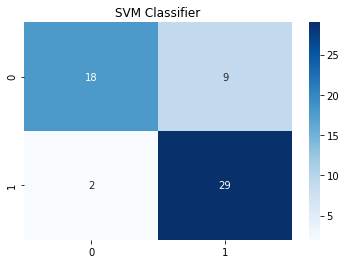

In [42]:
some_metrics(y_pred, 'SVM Classifier')

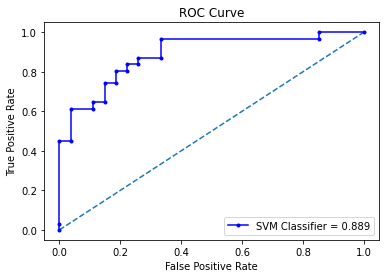

In [43]:
roc_auc(svm, 'SVM Classifier')

## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)

GaussianNB()

In [45]:
y_pred = gnb.predict(x_test_scaled)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.82      0.67      0.73        27
           1       0.75      0.87      0.81        31

    accuracy                           0.78        58
   macro avg       0.78      0.77      0.77        58
weighted avg       0.78      0.78      0.77        58

Accuracy:  0.7758620689655172


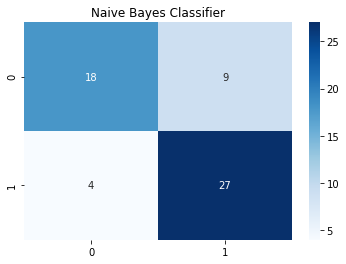

In [46]:
some_metrics(y_pred, 'Naive Bayes Classifier')

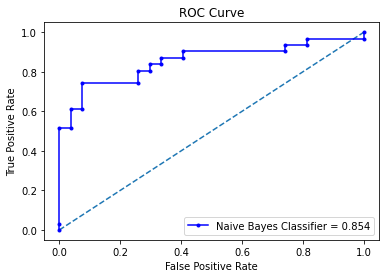

In [47]:
roc_auc(gnb, 'Naive Bayes Classifier')

In [48]:
cross_validation_score(gnb)

Cross Validation Max Score:  0.9130434782608695
Cross Validation Min Score:  0.6956521739130435
Cross Validation Mean Score:  0.8337944664031621


## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'gini')

dtc.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dtc.predict(x_test_scaled)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.72      0.90      0.80        31

    accuracy                           0.76        58
   macro avg       0.78      0.75      0.75        58
weighted avg       0.78      0.76      0.75        58

Accuracy:  0.7586206896551724


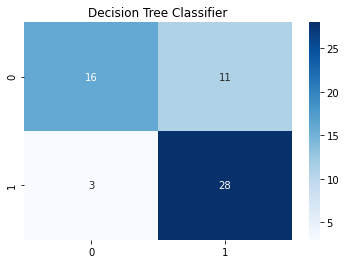

In [51]:
some_metrics(y_pred, 'Decision Tree Classifier')

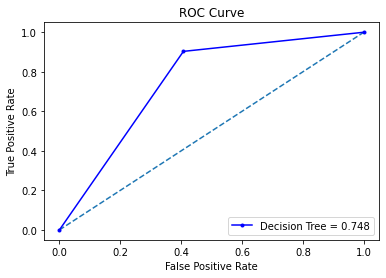

In [52]:
roc_auc(dtc, 'Decision Tree')

In [53]:
dtc_params = [{'criterion': ['gini', 'entropy'], 
               'splitter': ['best', 'random'], 
               'max_features': ['auto', 'sqrt', 'log2']}]

fit_with_best(dtc, dtc_params)

En iyi parametreler:  {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'}
En iyi Sonuç:  0.7804347826086957 



In [54]:
cross_validation_score(dtc)

Cross Validation Max Score:  0.9130434782608695
Cross Validation Min Score:  0.5652173913043478
Cross Validation Mean Score:  0.7683794466403161


## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 30, criterion = 'gini')

rfc.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=30)

In [56]:
y_pred = rfc.predict(x_test_scaled)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.89      0.59      0.71        27
           1       0.72      0.94      0.82        31

    accuracy                           0.78        58
   macro avg       0.81      0.76      0.76        58
weighted avg       0.80      0.78      0.77        58

Accuracy:  0.7758620689655172


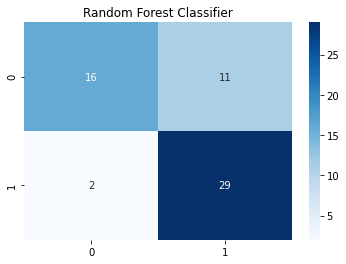

In [57]:
some_metrics(y_pred, 'Random Forest Classifier')

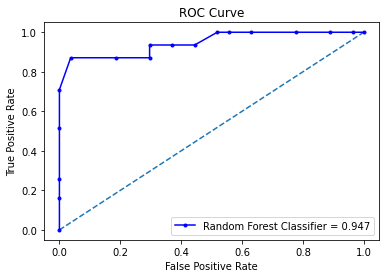

In [58]:
roc_auc(rfc, 'Random Forest Classifier')

In [59]:
rfc_params = [{'n_estimators': [i for i in range(35)], 
               'criterion': ['gini', 'entropy'], 
               'max_features': ['auto', 'sqrt', 'log2'], 
               'class_weight': ['balanced', 'balanced_subsample']}]

fit_with_best(rfc, rfc_params)

En iyi parametreler:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 29}
En iyi Sonuç:  0.8648221343873519 



In [60]:
cross_validation_score(rfc)

Cross Validation Max Score:  0.9545454545454546
Cross Validation Min Score:  0.6521739130434783
Cross Validation Mean Score:  0.8167984189723321


## Neural Network

In [62]:
from sklearn import neural_network

nn = neural_network.MLPClassifier(activation = 'relu', 
                                  solver = 'adam', 
                                  alpha = 0.0001, 
                                  max_iter = 200, 
                                  shuffle = True, 
                                  early_stopping = False, 
                                  verbose = True, 
                                  validation_fraction = 0.1)

nn.fit(x_train_scaled, y_train)

Iteration 1, loss = 0.74702995
Iteration 2, loss = 0.72754258
Iteration 3, loss = 0.71170708
Iteration 4, loss = 0.69908875
Iteration 5, loss = 0.68736674
Iteration 6, loss = 0.67691254
Iteration 7, loss = 0.66801222
Iteration 8, loss = 0.65913018
Iteration 9, loss = 0.65142246
Iteration 10, loss = 0.64436297
Iteration 11, loss = 0.63696535
Iteration 12, loss = 0.63052066
Iteration 13, loss = 0.62389039
Iteration 14, loss = 0.61734115
Iteration 15, loss = 0.61097063
Iteration 16, loss = 0.60452533
Iteration 17, loss = 0.59763901
Iteration 18, loss = 0.59082926
Iteration 19, loss = 0.58413943
Iteration 20, loss = 0.57742675
Iteration 21, loss = 0.57109606
Iteration 22, loss = 0.56480414
Iteration 23, loss = 0.55842399
Iteration 24, loss = 0.55232874
Iteration 25, loss = 0.54647725
Iteration 26, loss = 0.54065096
Iteration 27, loss = 0.53472750
Iteration 28, loss = 0.52902407
Iteration 29, loss = 0.52364840
Iteration 30, loss = 0.51816158
Iteration 31, loss = 0.51282120
Iteration 32, los

MLPClassifier(verbose=True)

In [63]:
y_pred = nn.predict(x_test_scaled)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.81      0.63      0.71        27
           1       0.73      0.87      0.79        31

    accuracy                           0.76        58
   macro avg       0.77      0.75      0.75        58
weighted avg       0.77      0.76      0.75        58

Accuracy:  0.7586206896551724


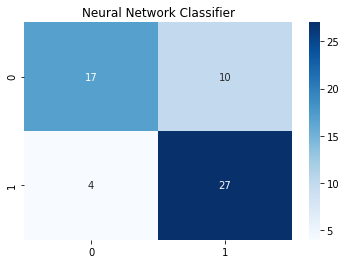

In [64]:
some_metrics(y_pred, 'Neural Network Classifier')

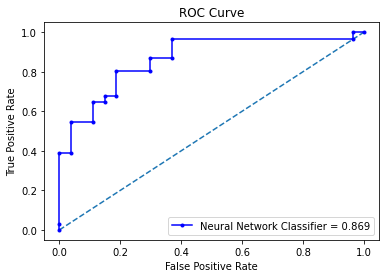

In [65]:
roc_auc(nn, 'Neural Network Classifier')

In [67]:
nn_params = [{'activation': ['logistic', 'tanh', 'relu'], 
              'solver': ['lbfgs', 'sgd', 'adam'], 
              'early_stopping': [False, True]}]

fit_with_best(nn, nn_params)

En iyi parametreler:  {'activation': 'relu', 'early_stopping': False, 'solver': 'lbfgs'}
En iyi Sonuç:  0.8209486166007904 



In [68]:
cross_validation_score(nn)

Iteration 1, loss = 12.45800752
Iteration 2, loss = 6.12829014
Iteration 3, loss = 1.14204277
Iteration 4, loss = 2.39992282
Iteration 5, loss = 3.13499577
Iteration 6, loss = 2.41169637
Iteration 7, loss = 1.07531733
Iteration 8, loss = 1.19670229
Iteration 9, loss = 1.85474511
Iteration 10, loss = 1.95634797
Iteration 11, loss = 1.47407693
Iteration 12, loss = 0.93771359
Iteration 13, loss = 1.14608813
Iteration 14, loss = 1.23002897
Iteration 15, loss = 1.00401029
Iteration 16, loss = 0.87632835
Iteration 17, loss = 0.89316856
Iteration 18, loss = 0.99776628
Iteration 19, loss = 0.89492448
Iteration 20, loss = 0.82313645
Iteration 21, loss = 0.97495799
Iteration 22, loss = 0.98700746
Iteration 23, loss = 0.78126820
Iteration 24, loss = 0.77907166
Iteration 25, loss = 0.77687165
Iteration 26, loss = 0.70260324
Iteration 27, loss = 0.69052931
Iteration 28, loss = 0.70864362
Iteration 29, loss = 0.65605540
Iteration 30, loss = 0.64762663
Iteration 31, loss = 0.62187209
Iteration 32, lo

Iteration 116, loss = 0.50730791
Iteration 117, loss = 0.67952888
Iteration 118, loss = 0.43198156
Iteration 119, loss = 0.58528230
Iteration 120, loss = 0.56154859
Iteration 121, loss = 0.47212054
Iteration 122, loss = 0.73507637
Iteration 123, loss = 0.49551108
Iteration 124, loss = 0.50920621
Iteration 125, loss = 0.48344834
Iteration 126, loss = 0.45958543
Iteration 127, loss = 0.58987753
Iteration 128, loss = 0.53480898
Iteration 129, loss = 0.41824190
Iteration 130, loss = 0.41862023
Iteration 131, loss = 0.54316873
Iteration 132, loss = 0.59260508
Iteration 133, loss = 0.40762361
Iteration 134, loss = 0.68004528
Iteration 135, loss = 0.50252400
Iteration 136, loss = 0.60126900
Iteration 137, loss = 0.98452477
Iteration 138, loss = 0.41640904
Iteration 139, loss = 0.77627276
Iteration 140, loss = 1.08849901
Iteration 141, loss = 0.65660545
Iteration 142, loss = 0.49938499
Iteration 143, loss = 1.03195587
Iteration 144, loss = 0.49919861
Training loss did not improve more than tol

Iteration 21, loss = 1.28043109
Iteration 22, loss = 1.22057630
Iteration 23, loss = 1.16836797
Iteration 24, loss = 1.14220197
Iteration 25, loss = 1.13291043
Iteration 26, loss = 1.08944868
Iteration 27, loss = 1.02095722
Iteration 28, loss = 0.96559340
Iteration 29, loss = 0.97794267
Iteration 30, loss = 1.00557473
Iteration 31, loss = 0.93486496
Iteration 32, loss = 0.85076900
Iteration 33, loss = 0.98414203
Iteration 34, loss = 1.19844041
Iteration 35, loss = 1.00851765
Iteration 36, loss = 0.76716241
Iteration 37, loss = 0.90130452
Iteration 38, loss = 1.18953472
Iteration 39, loss = 1.11788629
Iteration 40, loss = 0.84243995
Iteration 41, loss = 0.71003062
Iteration 42, loss = 0.74039850
Iteration 43, loss = 0.75449670
Iteration 44, loss = 0.71819699
Iteration 45, loss = 0.70533670
Iteration 46, loss = 0.66963723
Iteration 47, loss = 0.64494773
Iteration 48, loss = 0.63861259
Iteration 49, loss = 0.66418876
Iteration 50, loss = 0.61337098
Iteration 51, loss = 0.64253395
Iteratio

Iteration 4, loss = 9.79727009
Iteration 5, loss = 5.31956032
Iteration 6, loss = 2.72529970
Iteration 7, loss = 3.06737595
Iteration 8, loss = 4.40251555
Iteration 9, loss = 5.35963229
Iteration 10, loss = 5.65550853
Iteration 11, loss = 5.35012987
Iteration 12, loss = 4.56841679
Iteration 13, loss = 3.58884561
Iteration 14, loss = 2.81723988
Iteration 15, loss = 2.43279914
Iteration 16, loss = 2.53061643
Iteration 17, loss = 3.00540293
Iteration 18, loss = 3.55479609
Iteration 19, loss = 3.65985490
Iteration 20, loss = 3.23195252
Iteration 21, loss = 2.66403034
Iteration 22, loss = 2.26138394
Iteration 23, loss = 2.01778248
Iteration 24, loss = 1.92074337
Iteration 25, loss = 1.99777072
Iteration 26, loss = 2.04834267
Iteration 27, loss = 1.87818285
Iteration 28, loss = 1.57879565
Iteration 29, loss = 1.42058032
Iteration 30, loss = 1.48473649
Iteration 31, loss = 1.55406645
Iteration 32, loss = 1.43907476
Iteration 33, loss = 1.18583502
Iteration 34, loss = 1.00148430
Iteration 35, 